In [2]:
import pandas as pd

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Concepts of technologies and AI/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print(df.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [9]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [14]:
df = df.dropna()
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [19]:
X = df.drop('Glucose', axis=1).values
y = df['Insulin'].values
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [20]:
import numpy as np

k = 3
y_pred = []
for query in X_test:
  distances = []
  for i in range(len(X_train)):
    distance = np.sqrt(np.sum((X_train[i] - query) ** 2))
    distances.append((distance, y_train[i]))

  distances.sort(key=lambda x: x[0])
  neighbors = distances[:k]

  classes = [neighbor[1] for neighbor in neighbors]
  prediction = max(set(classes), key=classes.count)
  y_pred.append(prediction)

y_pred = np.array(y_pred)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.5324675324675324


Problem - 2 - Experimentation:

1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [22]:
from sklearn.preprocessing import StandardScaler
X = df.drop('BloodPressure', axis=1).values
y = df['SkinThickness'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_size = int(0.7 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


2. Comparative Analysis: Compare the

Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

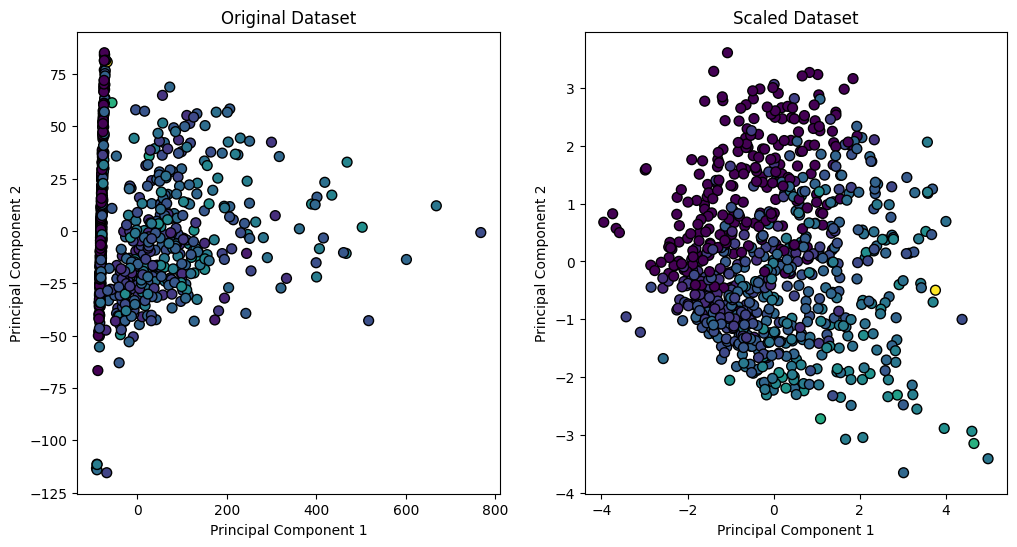

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_original_2d = pca.fit_transform(X)
X_scaled_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_original_2d[:, 0], X_original_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled_2d[:, 0], X_scaled_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Scaled Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [26]:
import time

X_train_scaled, X_test_scaled = X_scaled[:train_size], X_scaled[train_size:]

results_original = []
results_scaled = []

for k in range(1, 16):
    y_pred_original = []
    y_pred_scaled = []

    start_time = time.time()
    for query in X_test:
        distances = []
        for i in range(len(X_train)):
            distance = np.sqrt(np.sum((X_train[i] - query) ** 2))
            distances.append((distance, y_train[i]))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        classes = [neighbor[1] for neighbor in neighbors]
        prediction = max(set(classes), key=classes.count)
        y_pred_original.append(prediction)
    end_time = time.time()
    accuracy_original = np.sum(np.array(y_pred_original) == y_test) / len(y_test)
    time_original = end_time - start_time
    results_original.append((k, accuracy_original, time_original))

    start_time = time.time()
    for query in X_test_scaled:
        distances = []
        for i in range(len(X_train_scaled)):
            distance = np.sqrt(np.sum((X_train_scaled[i] - query) ** 2))
            distances.append((distance, y_train[i]))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        classes = [neighbor[1] for neighbor in neighbors]
        prediction = max(set(classes), key=classes.count)
        y_pred_scaled.append(prediction)
    end_time = time.time()
    accuracy_scaled = np.sum(np.array(y_pred_scaled) == y_test) / len(y_test)
    time_scaled = end_time - start_time
    results_scaled.append((k, accuracy_scaled, time_scaled))

print("Results for Original Dataset:")
for result in results_original:
    print(f"k={result[0]}, Accuracy={result[1]:.4f}, Time={result[2]:.4f} seconds")

print("\nResults for Scaled Dataset:")
for result in results_scaled:
    print(f"k={result[0]}, Accuracy={result[1]:.4f}, Time={result[2]:.4f} seconds")


Results for Original Dataset:
k=1, Accuracy=0.3333, Time=0.9545 seconds
k=2, Accuracy=0.3463, Time=0.9163 seconds
k=3, Accuracy=0.3463, Time=0.8880 seconds
k=4, Accuracy=0.3506, Time=1.6946 seconds
k=5, Accuracy=0.3333, Time=1.8945 seconds
k=6, Accuracy=0.3290, Time=1.9320 seconds
k=7, Accuracy=0.3377, Time=1.3145 seconds
k=8, Accuracy=0.3420, Time=0.9185 seconds
k=9, Accuracy=0.3463, Time=0.8957 seconds
k=10, Accuracy=0.3290, Time=0.9155 seconds
k=11, Accuracy=0.3290, Time=1.6018 seconds
k=12, Accuracy=0.3377, Time=1.6862 seconds
k=13, Accuracy=0.3290, Time=1.6348 seconds
k=14, Accuracy=0.3203, Time=0.9820 seconds
k=15, Accuracy=0.3160, Time=0.9233 seconds

Results for Scaled Dataset:
k=1, Accuracy=0.3333, Time=0.8857 seconds
k=2, Accuracy=0.3463, Time=0.9280 seconds
k=3, Accuracy=0.3463, Time=0.9077 seconds
k=4, Accuracy=0.3506, Time=1.4572 seconds
k=5, Accuracy=0.3333, Time=2.7247 seconds
k=6, Accuracy=0.3290, Time=0.9814 seconds
k=7, Accuracy=0.3377, Time=1.6738 seconds
k=8, Accura

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

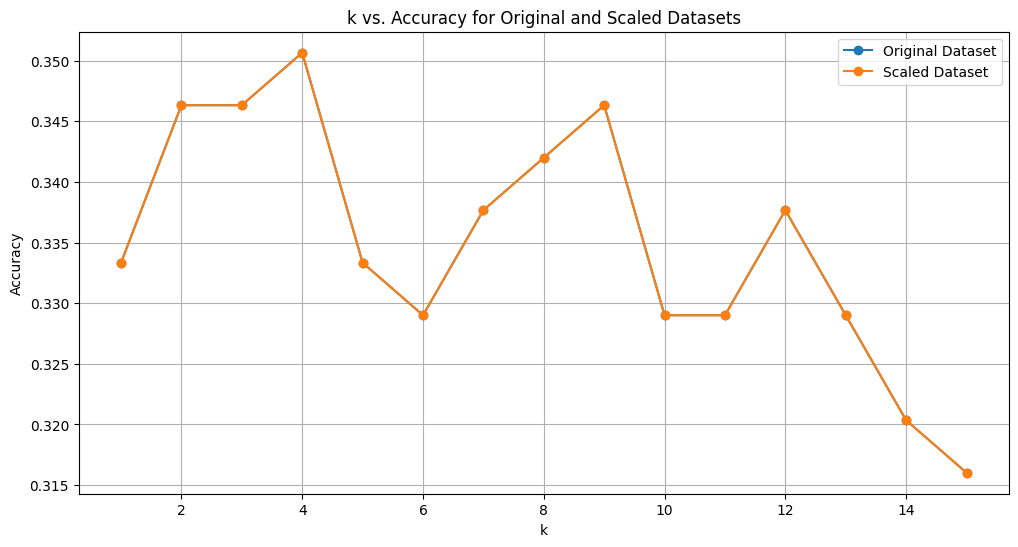

In [27]:

k_values = [result[0] for result in results_original]
accuracy_original = [result[1] for result in results_original]
accuracy_scaled = [result[1] for result in results_scaled]

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_original, label='Original Dataset', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy for Original and Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()
